In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp "/content/gdrive/My Drive/Garbage Yolo/All_Result_test_own.zip" /content
!unzip /content/All_Result_test_own.zip


Archive:  /content/All_Result_test_own.zip
   creating: content/test_own_picture/
   creating: content/test_own_picture/exp/
  inflating: content/test_own_picture/exp/Miller Road 3.jpg  
  inflating: content/test_own_picture/exp/Neighborhood Playground 2.jpg  
  inflating: content/test_own_picture/exp/Target 26.jpg  
  inflating: content/test_own_picture/exp/Neighborhood Forest 1.jpg  
  inflating: content/test_own_picture/exp/Neighborhood Playground 22.jpg  
  inflating: content/test_own_picture/exp/Target 38.jpg  
  inflating: content/test_own_picture/exp/Miller Road 11.jpg  
  inflating: content/test_own_picture/exp/Cumberland Farms 6.jpg  
  inflating: content/test_own_picture/exp/Target 33.jpg  
  inflating: content/test_own_picture/exp/Target 36.jpg  
  inflating: content/test_own_picture/exp/Cumberland Farms 9.jpg  
  inflating: content/test_own_picture/exp/Cumberland Farms 1.jpg  
  inflating: content/test_own_picture/exp/Haswell Road 3.jpg  
  inflating: content/test_own_pictu

In [ ]:
#%mkdir test_analysis_results
#%mkdir labels

In [ ]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_label = ["biodegradable","cardboard","glass","metal","paper","plastic"]
folder_path = './content/test_own_picture/exp/labels'#"/content/labels"#

def get_all_confidence_level(folder_path):
      data = {"filename":[],"location":[],"classification_label":[],"x":[],"y":[],"w":[],"h":[],"confidence":[]}
      for filename in os.listdir(folder_path):
          if filename.endswith(".txt"):
              file_path = os.path.join(folder_path, filename)
              with open(file_path, 'r') as file:
                  lines = file.readlines()
                  for line in lines:
                      parts = line.strip().split()
                      if len(parts) == 6:
                          classification_idx, x, y, w, h, ci = parts
                          classification_label = all_label[int(classification_idx)]
                          location =re.match(r"^(.*?)(?=\d)", filename)
                          result_location= location.group(1)
                          for key, values in zip(data,[filename,result_location,classification_label, float(x), float(y), float(w), float(h), float(ci)]):
                              data[key].append(values)
      return data

data = get_all_confidence_level(folder_path)
df = pd.DataFrame.from_dict(data)

print(df)

df.to_csv('./test_analysis_results/data.csv', index=False)

                           filename                  location  \
0              Backyard Ditch 3.txt           Backyard Ditch    
1                 Miller Road 6.txt              Miller Road    
2           Cumberland Farms 14.txt         Cumberland Farms    
3    Neighborhood Playground 20.txt  Neighborhood Playground    
4    Neighborhood Playground 20.txt  Neighborhood Playground    
..                              ...                       ...   
162       Neighborhood Forest 2.txt      Neighborhood Forest    
163                   Target 27.txt                   Target    
164                   Target 27.txt                   Target    
165                   Target 27.txt                   Target    
166                   Target 27.txt                   Target    

    classification_label         x         y         w         h  confidence  
0                plastic  0.482804  0.508805  0.597884  0.511657    0.315207  
1                  paper  0.500000  0.500000  1.000000  1.000

Garbage Type Distribution

Index(['biodegradable', 'metal', 'plastic', 'paper', 'glass', 'cardboard'], dtype='object', name='classification_label')
[60 43 31 23  7  3]


<ipython-input-40-3cfc2ea454e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=garbage_counts.index, y=garbage_counts.values, palette="Set2")


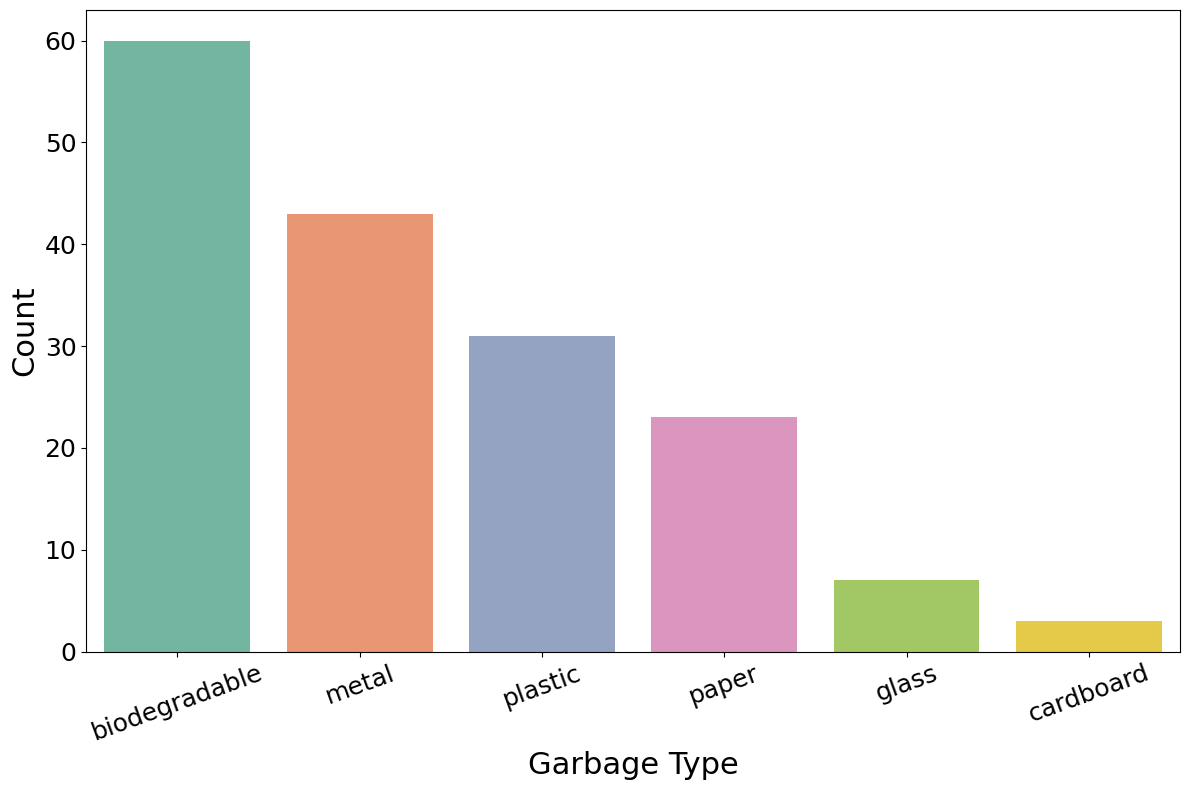

In [ ]:
garbage_counts = df['classification_label'].value_counts()
plt.figure(figsize=(12, 8))
print(garbage_counts.index)
print(garbage_counts.values)
sns.barplot(x=garbage_counts.index, y=garbage_counts.values, palette="Set2")
#plt.title('Distribution of Garbage Types')
plt.xlabel('Garbage Type', size=22)
plt.ylabel('Count', size=22)
plt.xticks(rotation=20, size=18)
plt.yticks(size=18)
plt.tight_layout()

plt.savefig("./test_analysis_results/garbage_type_distribution.png")
plt.show()

Location-Based Analysis

<Figure size 1200x800 with 0 Axes>

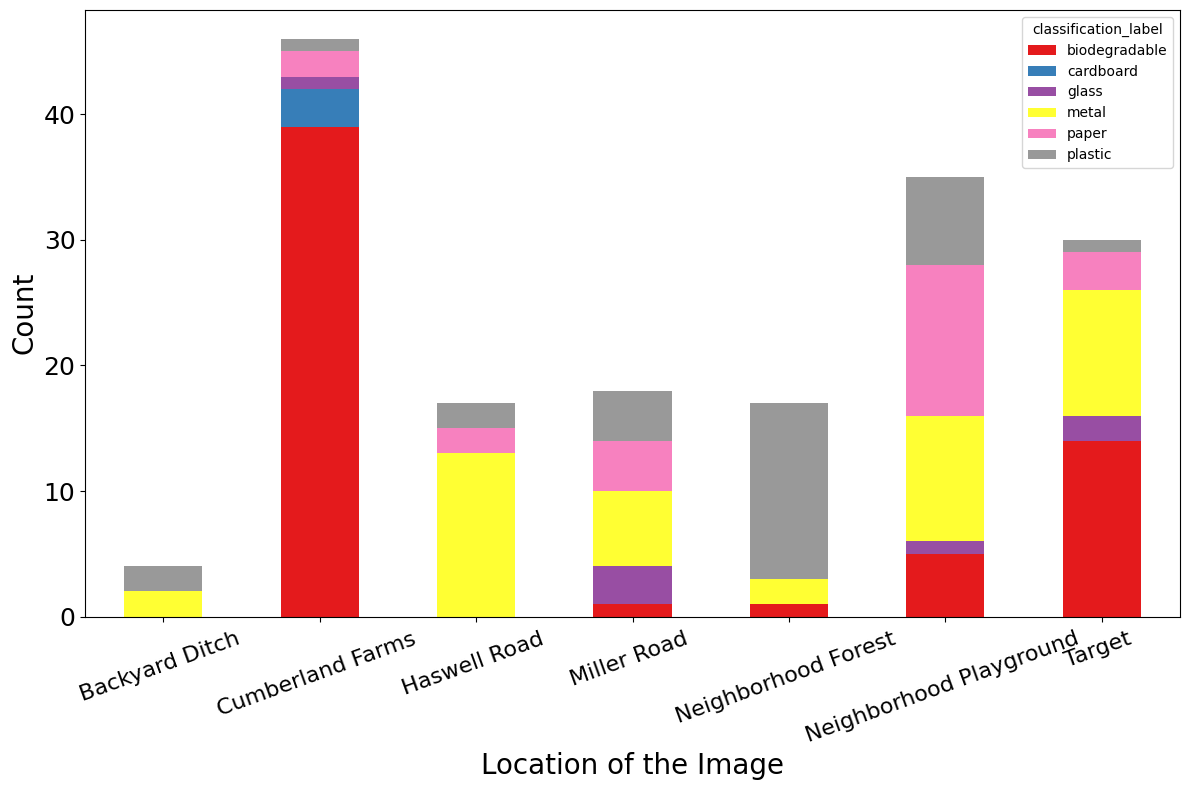

In [ ]:
location_garbage_distribution = df.groupby(['location', 'classification_label']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
location_garbage_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
#sns.barplot(x="location",y="Count",hue="classification_label",data=location_garbage_distribution,hue_order=["biodegradable","metal","plastic","paper","glass","cardboard"],stacked=True,colormap='Set1')
#plt.title('Garbage Distribution by Location')
plt.xlabel('Location of the Image', size=20)
plt.ylabel('Count', size=20)
plt.xticks(rotation=20, size=16)
plt.yticks(size=18)
plt.tight_layout()
plt.savefig("./test_analysis_results/location_based_distribution.png")

plt.show()


Confidence Level Analysis

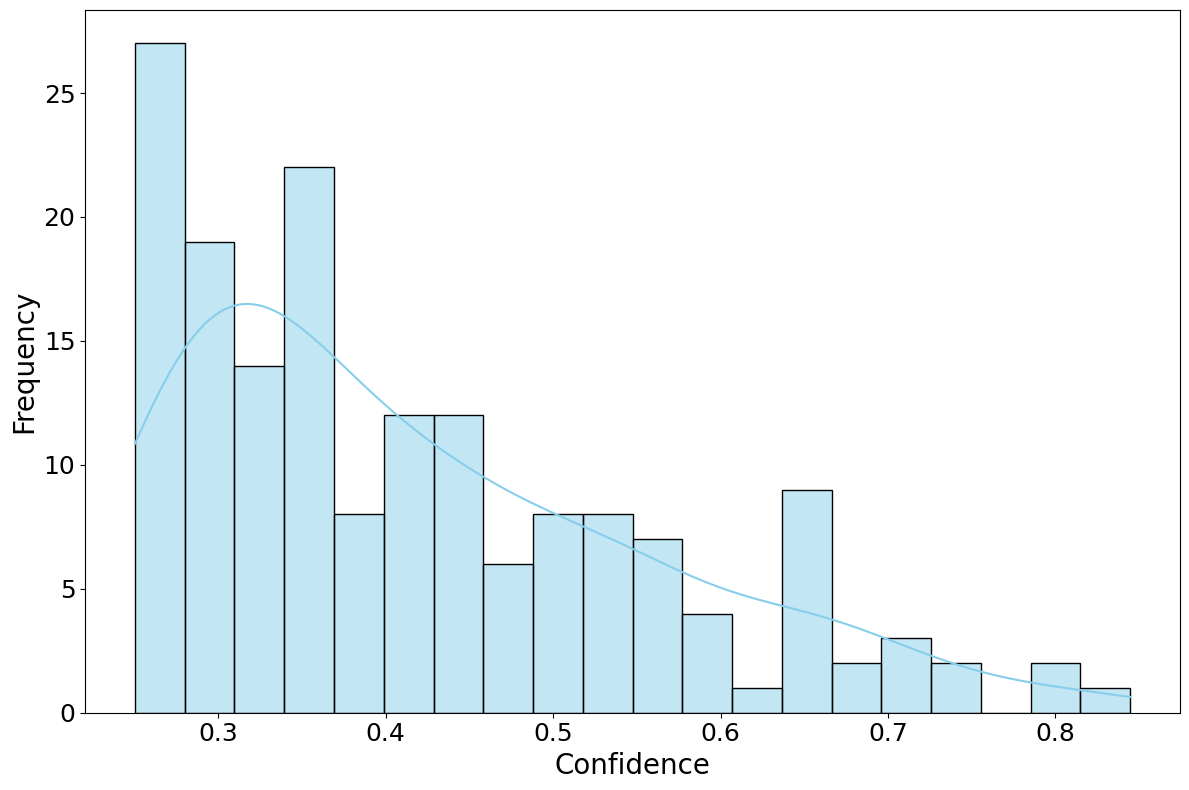

<ipython-input-37-34aadb8aa5fe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification_label', y='confidence', data=confidence_by_type, palette="Set1")


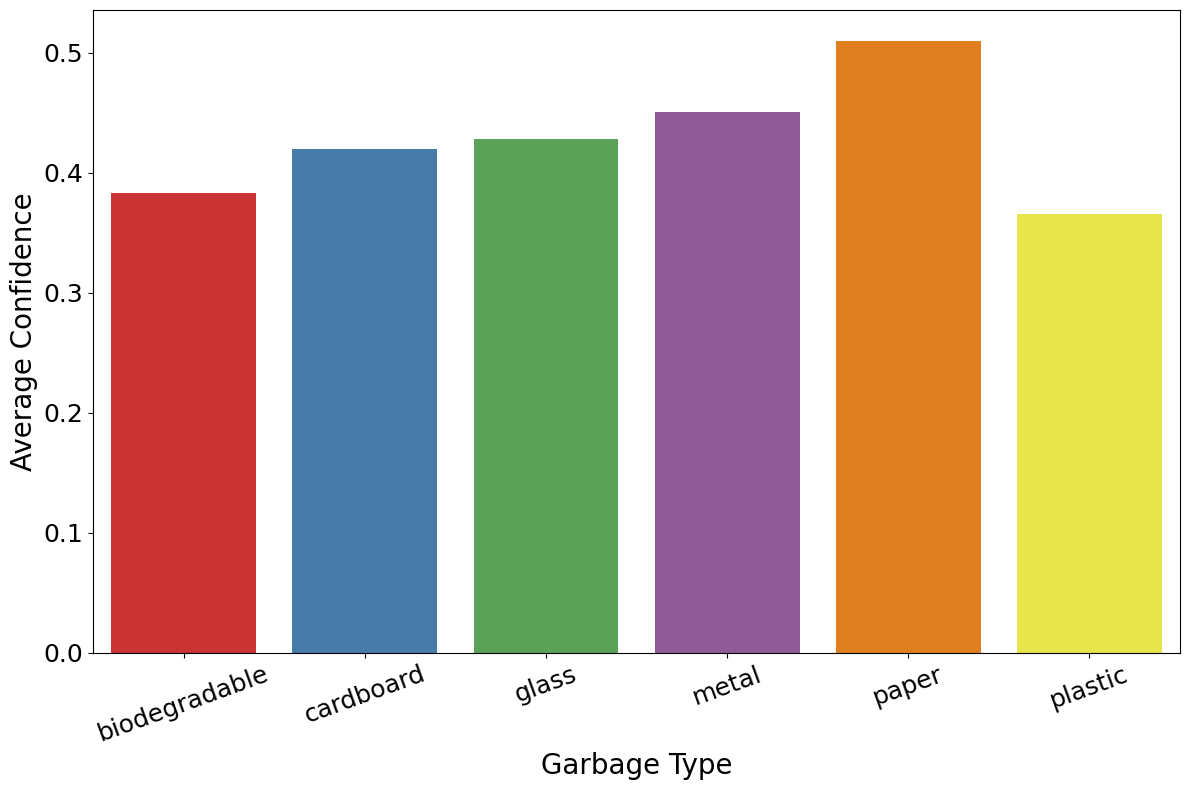

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['confidence'], bins=20, kde=True, color='skyblue')
#plt.title('Confidence Level Distribution', size=20)
plt.xlabel('Confidence', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.tight_layout()
plt.savefig("./test_analysis_results/confidence_level_distribution.png")
plt.show()

plt.figure(figsize=(12, 8))
confidence_by_type = df.groupby('classification_label')['confidence'].mean().reset_index()
sns.barplot(x='classification_label', y='confidence', data=confidence_by_type, palette="Set1")
#plt.title('Average Confidence Level by Garbage Type')
plt.xlabel('Garbage Type',size=20)
plt.ylabel('Average Confidence',size=20)

plt.xticks(rotation=20,size=18)
plt.yticks(size=18)
plt.tight_layout()

plt.savefig("./test_analysis_results/average_confidence_vs_garbage_type.png")

plt.show()

Correlation between detected size and the confidence level

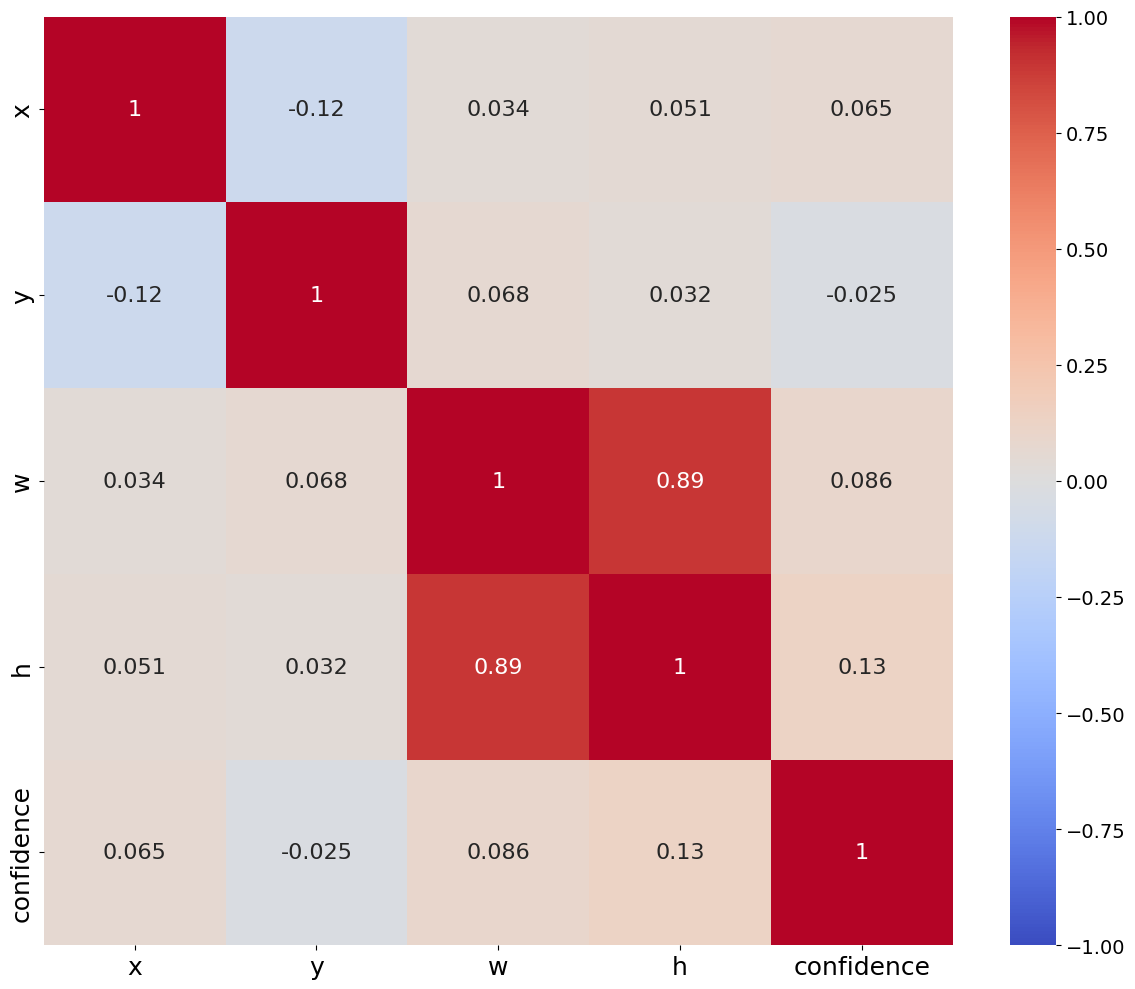

In [ ]:
correlation_matrix = df[['x', 'y', 'w', 'h', 'confidence']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 16}, cmap='coolwarm', vmin=-1, vmax=1, center=0)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix of Garbage Detection Data', fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
plt.tight_layout()

plt.savefig("./test_analysis_results/correlation_matrix.png")
plt.show()


In [ ]:
!zip -r test_result.zip /content/test_analysis_results/

  adding: content/test_analysis_results/ (stored 0%)
  adding: content/test_analysis_results/location_based_distribution.png (deflated 16%)
  adding: content/test_analysis_results/average_confidence_vs_garbage_type.png (deflated 19%)
  adding: content/test_analysis_results/data.csv (deflated 74%)
  adding: content/test_analysis_results/confidence_level_distribution.png (deflated 15%)
  adding: content/test_analysis_results/correlation_matrix.png (deflated 16%)
  adding: content/test_analysis_results/garbage_type_distribution.png (deflated 20%)
